# Linear Regression

Simple 1D linear regression

In [8]:
from collections import namedtuple

Model = namedtuple('Model', ['w', 'b', 'dw', 'db', 'loss'])

class LinearRegression:
    def __init__(self, xs_train=1, ys_train=1, w=0, b=0, learning_rate=0.001):
        self.m = len(xs_train)
        self.xs_train, self.ys_train = xs_train, ys_train
        self.w, self.b = w, b
        self.learning_rate = learning_rate
        
    def forward_backward_prop(self):
        """Perform forward and backward prop over all training examples
        
        Returns loss and gradients
        
        """
        loss = dw = db = 0
        for x, y in zip(self.xs_train, self.ys_train):
            # Forward Pass (predictions)
            y_hat = self.w*x + self.b

            # Accumulate loss
            loss += 0.5 * (y_hat-y)**2

            # Backpropagate to accumulate dw and db
            dloss = 1
            dy_hat = (y_hat-y) * dloss
            db += dy_hat
            dw += x * dy_hat
        
        return loss/self.m, dw/self.m, db/self.m
    
    def step(self):
        """Run one iteration of batch gradient descent"""
        
        loss, dw, db = self.forward_backward_prop()
        
        self.w -= self.learning_rate*dw
        self.b -= self.learning_rate*db
        
        return Model(self.w, self.b, dw, db, loss)

## Create Synthetic Data

/home/ebanner/.anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


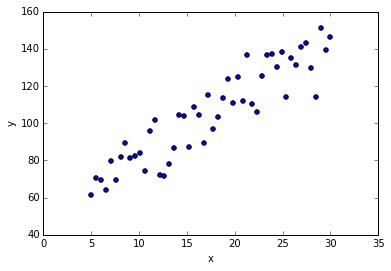

In [14]:
m = 50

xs_train = np.linspace(5, 30, num=m)
w_true, b = np.array([3.0]), 50

# Compute ys
noise_level = 10
ys_train = w_true[0]*xs_train + b
ys_train = np.array([y + np.random.randn()*noise_level for y in ys_train])

pd.DataFrame({'x': xs_train, 'y': ys_train}).plot(kind='scatter', x='x', y='y')

## Visualize the Model

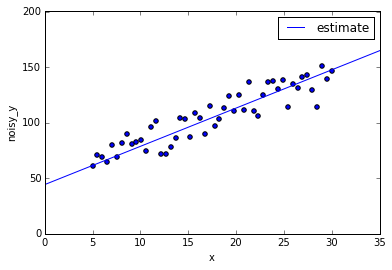

In [15]:
from ipywidgets import interact, fixed

lr = LinearRegression(xs_train, ys_train)
def estimates(iters):
    for _ in range(iters):
        yield lr.step()
    
estimates = list(estimates(15000))

@interact(xs_train=fixed(xs_train), ys_train=fixed(ys_train), view_index=(0, len(estimates)), estimates=fixed(estimates))
def plot(xs_train, ys_train, view_index, estimates):
    w, b, _, _, _ = estimates[view_index]
    
    xs = np.linspace(0, 50)
    
    # Get data into suitable form for plotting
    df1 = pd.DataFrame({'x': xs_train, 'noisy_y': ys_train})
    df2 = pd.DataFrame({'x': xs, 'estimate': w*xs + b})
    
    # Plot
    axes = df1.plot(kind='scatter', x='x', y='noisy_y')
    axes = df2.plot(ax=axes, x='x', y='estimate')
    
    axes.set_ylim(0,max(ys_train)+50)
    axes.set_xlim(0,max(xs_train)+5)

## Finite Difference Gradient Check

In [46]:
def num_grads():
    """Generate a list of numerical gradients of each w in ws"""
    
    delta_w = 0.0001
    
    for w in ws:
        fwmdw = -0.5 * (100 - (w-delta_w)*x)**2
        fwpdw = -0.5 * (100 - (w+delta_w)*x)**2
        
        yield (fwpdw-fwmdw) / (2*delta_w)
        
num_grads = np.array(list(num_grads()))

In [53]:
def analytic_grads():
    """Return the analytic gradient for each w in ws"""
    
    for w in ws:
        yield next(lin_reg(x=x, w=w, y_true=100)).dw
        
analytic_grads = np.array(list(analytic_grads()))

## Gradient Comparisons

In [57]:
pd.DataFrame(num_grads - analytic_grads, index=ws).mean()

0   -1.414009e-09
dtype: float64